# Time Series EDA

- look at a single continuous variable over time (uniform distribution)

- always need to resample to make sure data fits the correct formatt (uniform distribution)

- Looking to identify **trends** and **seasonality**

***

## Setup

°F = (K - 273.15) x 1.8000 + 32.00

- Temp data, function above formatts to degrees F

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
2012-10-01 18:00:00,61.327473
2012-10-01 19:00:00,61.390200
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652


***

### Data Dictionary: (What models try to identify)

***

- **Seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality


- **Trend**: long term upwards or downwards movement


- **Cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons
***

## Data Splitting

- Ideally all splits contain a season
- Human-based
- Percentage based
- Cross Validation

### Percentage-Based

- Blue is train, Orange is test

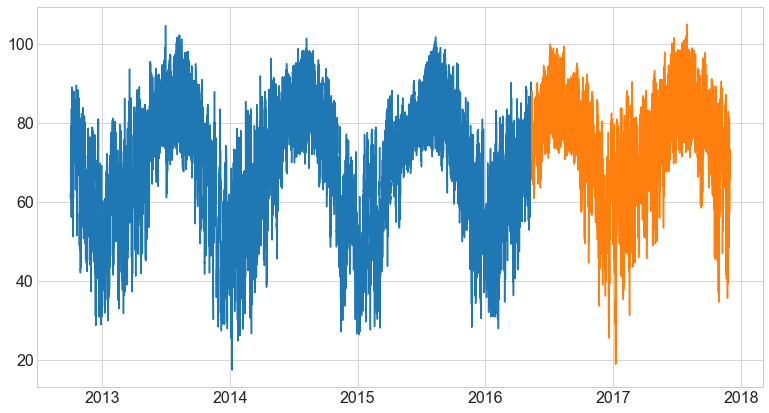

In [4]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)
plt.show()

### Human-Based

-Blue is train, Orange is test

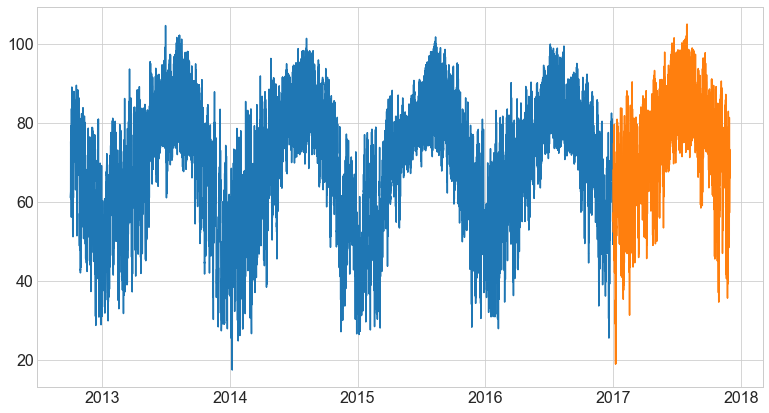

In [5]:
train = df[:'2016'] # includes 2016
test = df['2017']

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)
plt.show()

## Visualizations

In [6]:
y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

### 1st Way to Visualize: Don't consider the time series

- Examine components of the date as a categorical feature

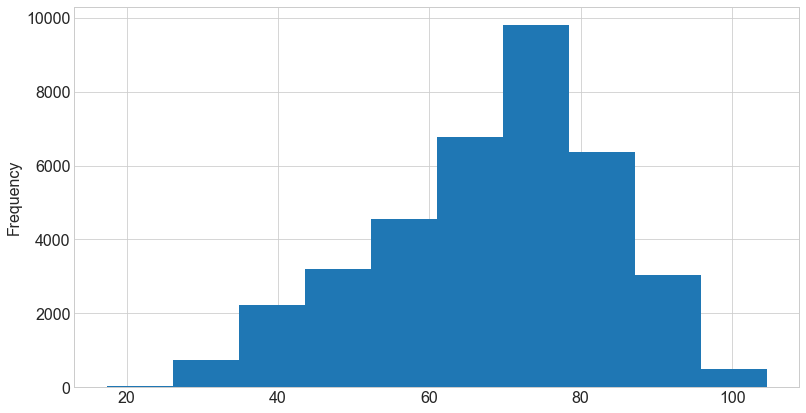

In [7]:
y.plot.hist()
plt.show()

### by month

<ipython-input-8-1f43d6b67977>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month


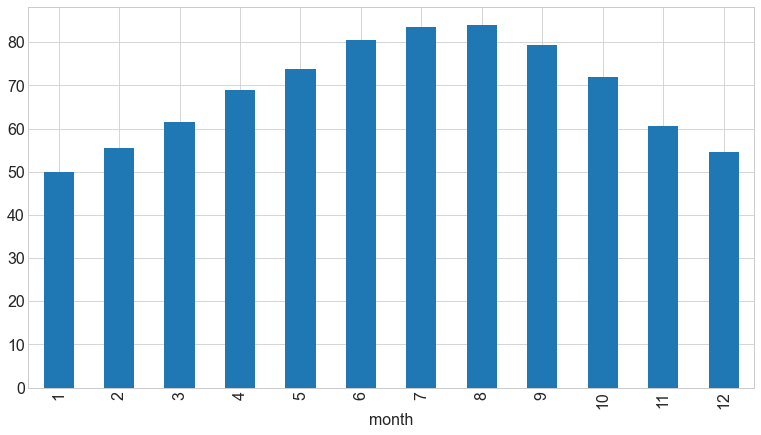

In [8]:
train['month'] = train.index.month
train.groupby('month').temp.mean().plot.bar()
plt.show()

### by weekday

In [9]:
train['weekday'] = train.index.day_name()
train.head()

<ipython-input-9-d3d3342929dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = train.index.day_name()


,temp,month,weekday
datetime,,,
2012-10-01 13:00:00,61.052000,10,Monday
2012-10-01 14:00:00,61.076568,10,Monday
2012-10-01 15:00:00,61.139294,10,Monday
2012-10-01 16:00:00,61.202020,10,Monday
2012-10-01 17:00:00,61.264747,10,Monday


In [10]:
train.weekday.value_counts()

Friday       5328
Tuesday      5328
Wednesday    5328
Thursday     5328
Saturday     5328
Monday       5315
Sunday       5304
Name: weekday, dtype: int64

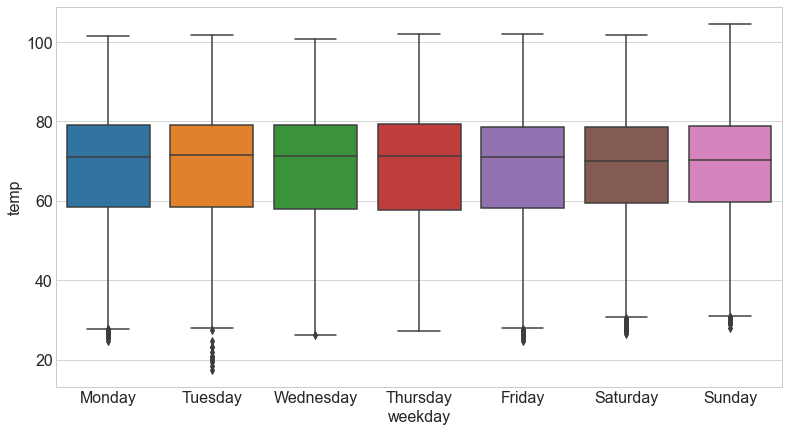

In [11]:
sns.boxplot(data = train, y='temp', x='weekday')
plt.show()

### Visualize the target over time

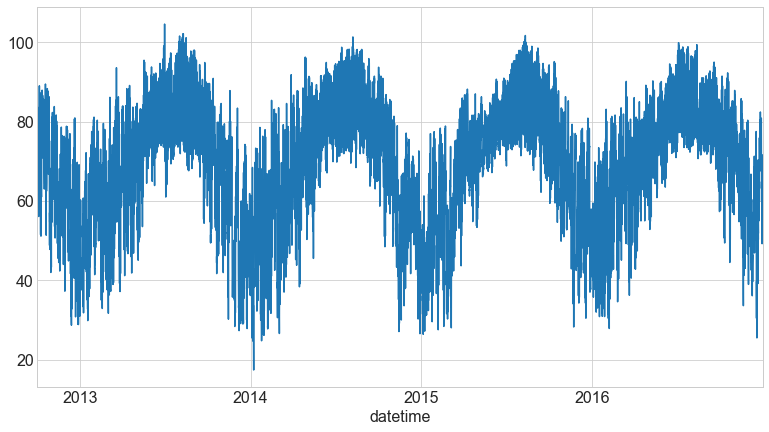

In [12]:
y.plot()
plt.show()
# Plots target variable over time

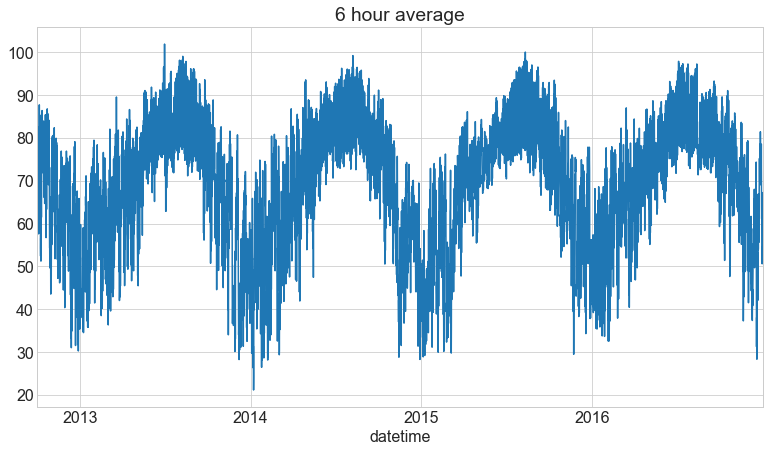

In [13]:
# Resampling data makes it less noisy, and easier to read
y.resample('6H').mean().plot(title='6 hour average')
plt.show()

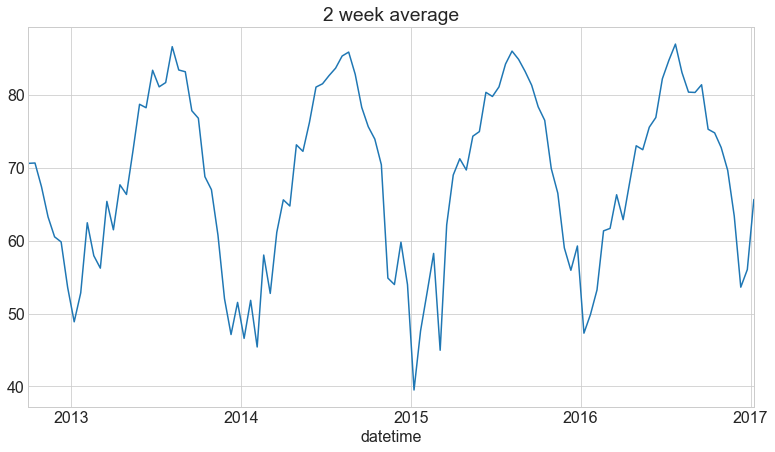

In [14]:
# 2 Week average really cleans up the daily variation nicely
y.resample('2W').mean().plot(title='2 week average')
plt.show()

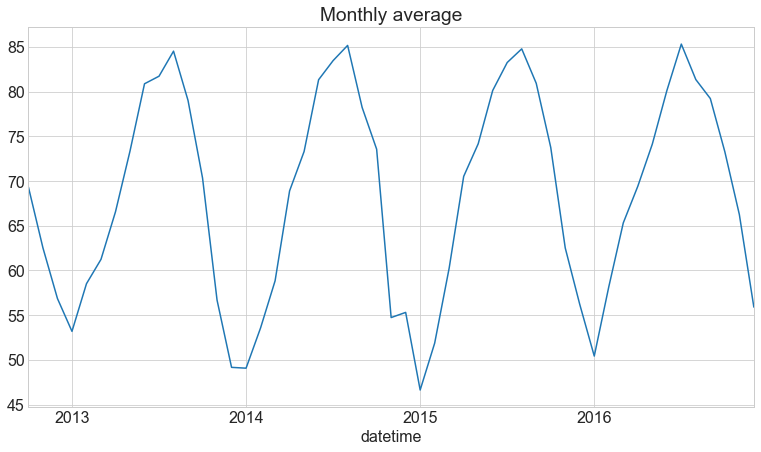

In [15]:
# Further reduces variation
y.resample('M').mean().plot(title='Monthly average')
plt.show()

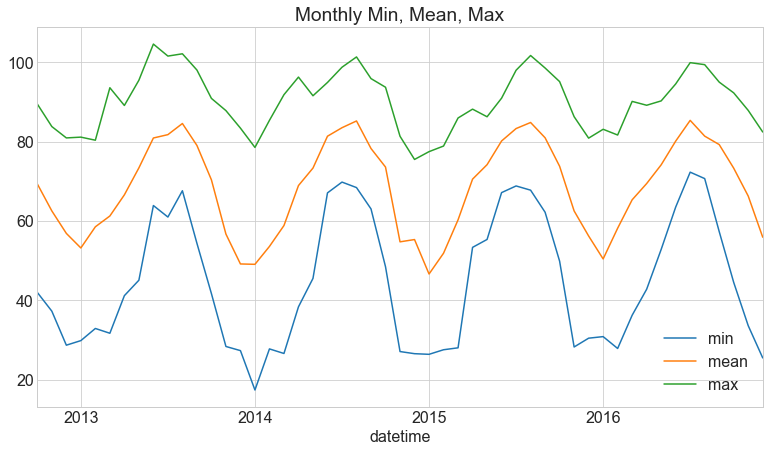

In [16]:
y.resample('M').agg(['min', 'mean', 'max']).plot(title='Monthly Min, Mean, Max')
plt.show()

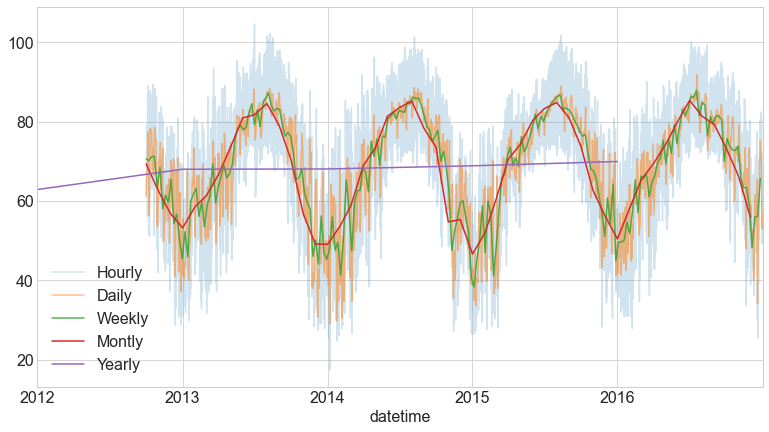

In [17]:
# Putting it al togeher on the same plot, alpha to adjust color
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

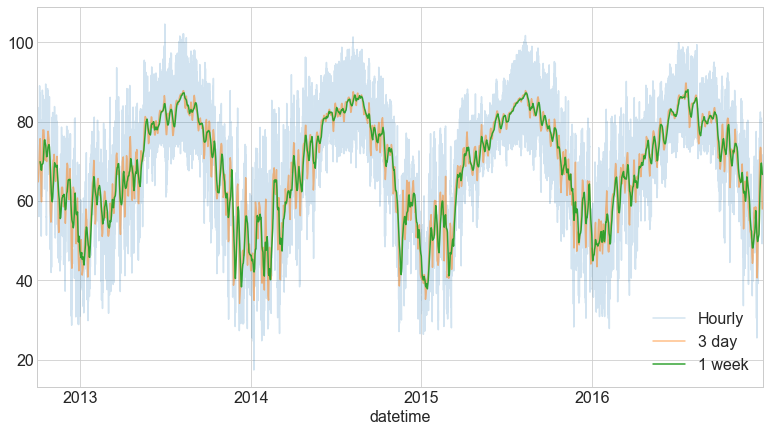

In [18]:
# Rolling averages smooth data, but maintain trends and seasonality
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()
plt.show()

### Visualize change over time

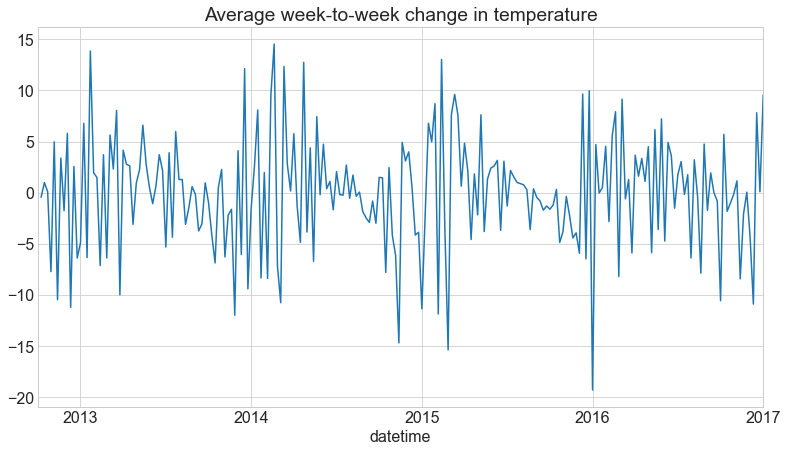

In [19]:
# Visualize the difference between this week and last week over time (Variability)
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')
plt.show()

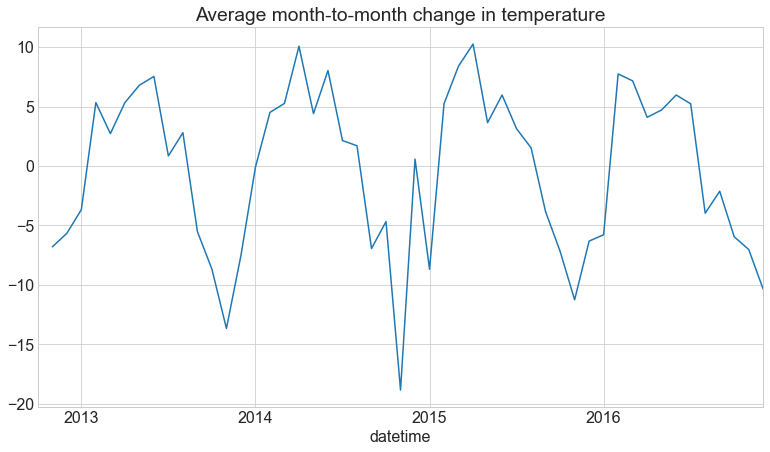

In [20]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')
plt.show()

### Seasonal Plot

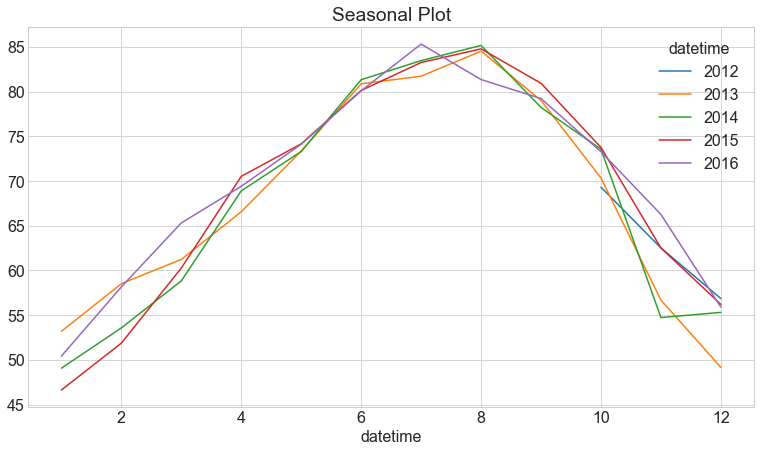

In [21]:
# .unstack turns an index level into columns (0th index = year)
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

### Seasonal Plot: How To

In [22]:
# Step #1: Group by
y.groupby([y.index.year, y.index.month]).mean()

datetime  datetime
2012      10          69.318705
          11          62.521575
          12          56.860014
2013      1           53.192333
          2           58.522799
          3           61.244479
          4           66.569717
          5           73.358529
          6           80.885728
          7           81.731819
          8           84.534117
          9           79.016805
          10          70.343832
          11          56.686028
          12          49.165310
2014      1           49.072897
          2           53.579080
          3           58.842459
          4           68.908933
          5           73.311970
          6           81.337658
          7           83.476876
          8           85.178102
          9           78.238621
          10          73.567252
          11          54.735951
          12          55.311824
2015      1           46.631940
          2           51.874683
          3           60.277705
          4          

In [23]:
# Step #2: Unstack
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

datetime,2012,2013,2014,2015,2016
datetime,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347
2,NaN,58.522799,53.579080,51.874683,58.165749
3,NaN,61.244479,58.842459,60.277705,65.323011
4,NaN,66.569717,68.908933,70.526879,69.415316
5,NaN,73.358529,73.311970,74.169747,74.129780
6,NaN,80.885728,81.337658,80.135967,80.097570
7,NaN,81.731819,83.476876,83.264325,85.325640
8,NaN,84.534117,85.178102,84.789859,81.357023
9,NaN,79.016805,78.238621,80.938208,79.233476


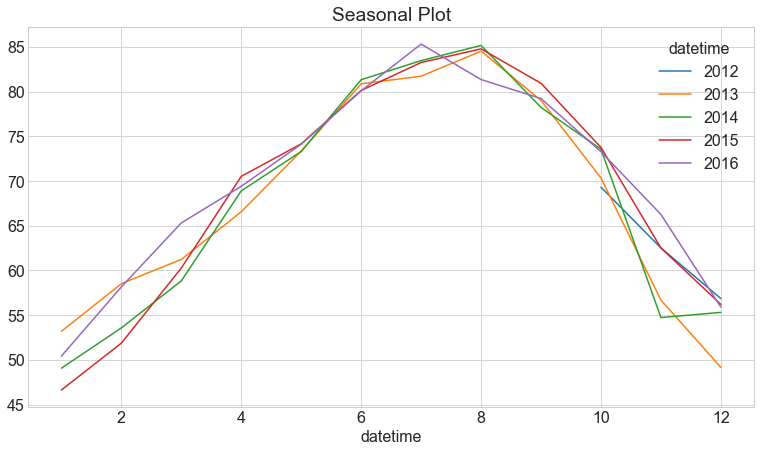

In [24]:
# Step #3: Graph
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

### Seasonal Subseries Plot

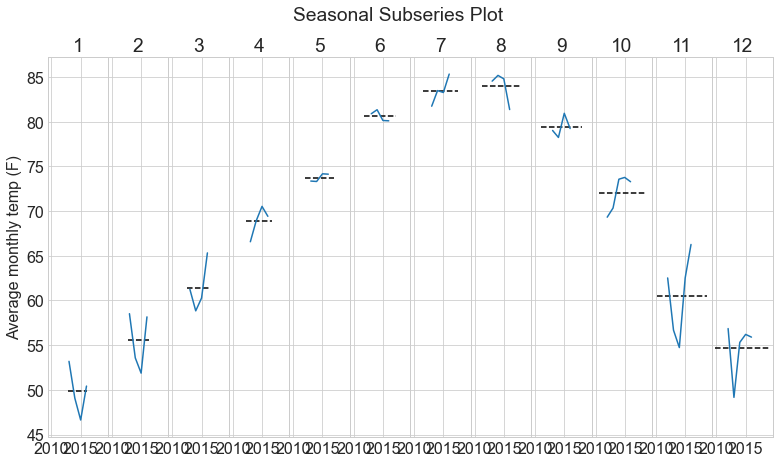

In [25]:
# Each column is one month, trends over time (year over year), black line is ave temp
# Blue line represents one months change year over year
# Shape of blue line is trend, black line is average

table = y.groupby([y.index.year, y.index.month]).mean().unstack() # Unstack makes the months in to columns

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

axs[0].set(ylabel='Average monthly temp (F)')
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)
#plt.tight_layout()

### Lag Plot

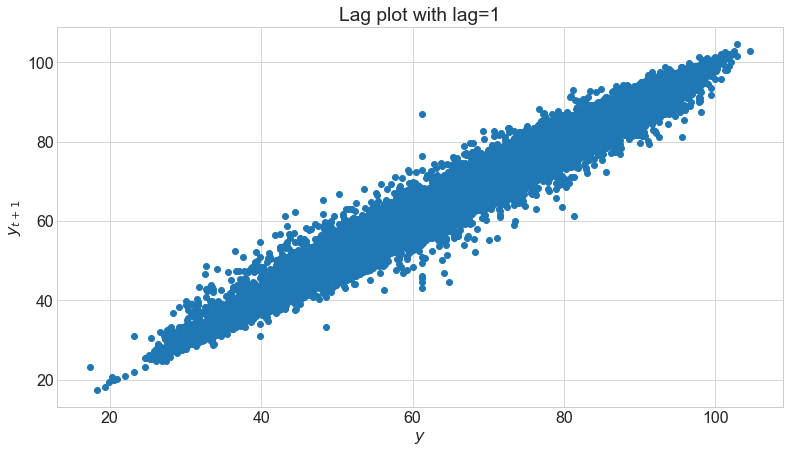

In [26]:
# Each y-value and the next y-value
# ave temp for this hour in relation to the next hour

plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')
plt.show()

<ipython-input-27-ca9c7ce789d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.temp.shift(-1)


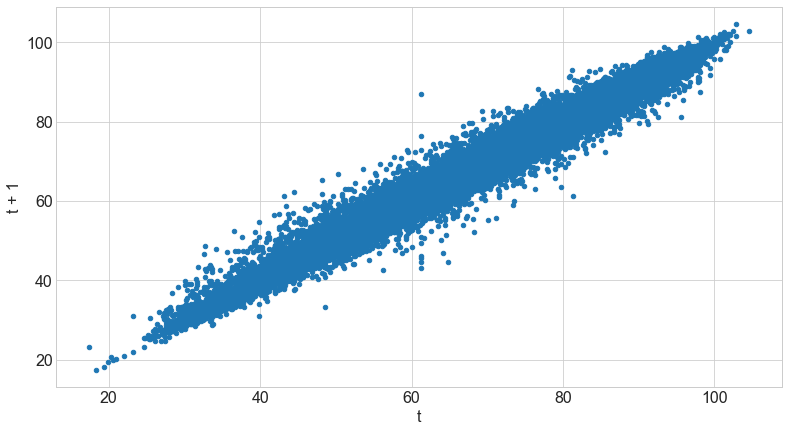

In [27]:
# Same idea different formatt (hourly data)

train['y(t + 1)'] = train.temp.shift(-1)
ax = train.plot.scatter(x='temp', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')
plt.show()

In [28]:
del train['y(t + 1)']
del train['month']

,this_week,the_next_week
datetime,,
2012-10-07,70.595201,70.152821
2012-10-14,70.152821,71.138375
2012-10-21,71.138375,71.230464
2012-10-28,71.230464,63.510554
2012-11-04,63.510554,68.482625
...,...,...
2016-12-04,59.062094,48.163625
2016-12-11,48.163625,55.979132
2016-12-18,55.979132,56.073143


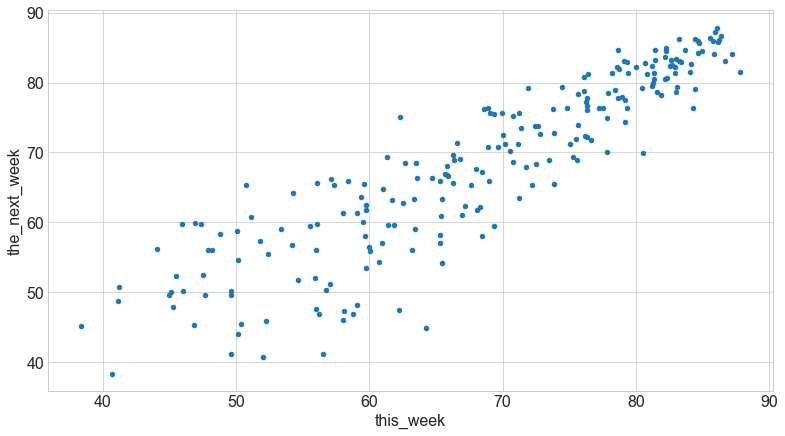

In [29]:
# Lag plot (1), sampled weekly (this week vs. next week)

weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

***
- **In the summer the avg temp is predictive of the following week, however the temp in the winter is not as predictive**

***

,this_week,12_weeks_out
datetime,,
2012-10-07,69.878323,50.376741
2012-10-14,70.152821,45.473616
2012-10-21,71.138375,52.252877
2012-10-28,71.230464,45.907936
2012-11-04,63.510554,59.763739
...,...,...
2016-12-04,59.062094,NaN
2016-12-11,48.163625,NaN
2016-12-18,55.979132,NaN


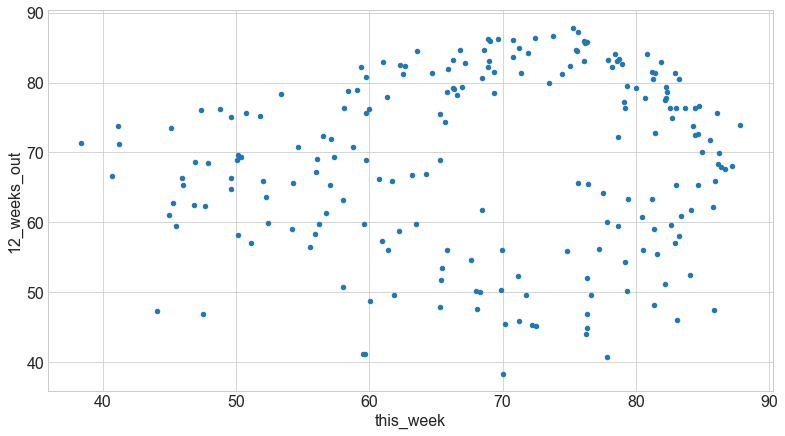

In [42]:
# Lag plot every 12 weeks (3 months)

weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

***
- **Most of the correlation is gone. Knowing the temp for this week does not really help me predict the temp 12 weeks from now**

***

,this_week,half_a_year_later
datetime,,
2012-10-07,70.595201,63.558611
2012-10-14,70.152821,66.345532
2012-10-21,71.138375,68.965502
2012-10-28,71.230464,65.862071
2012-11-04,63.510554,66.797107
...,...,...
2016-12-04,59.062094,NaN
2016-12-11,48.163625,NaN
2016-12-18,55.979132,NaN


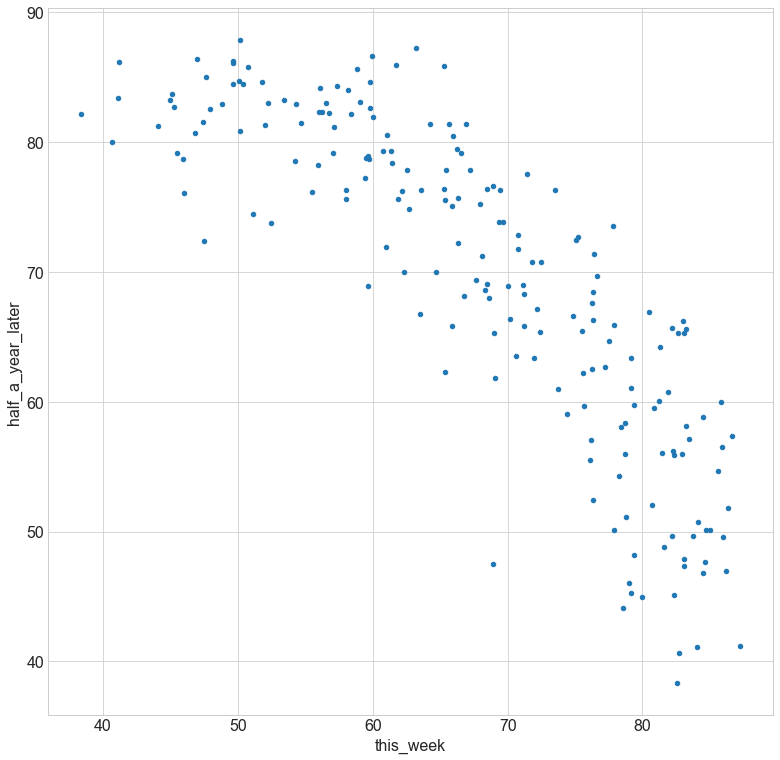

In [31]:
# Lag plot every 6 months (26 weeks)

weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

***
- **Correlation returns (negative), knowing temp this week is predictive of the temperature 6 months from now**

***

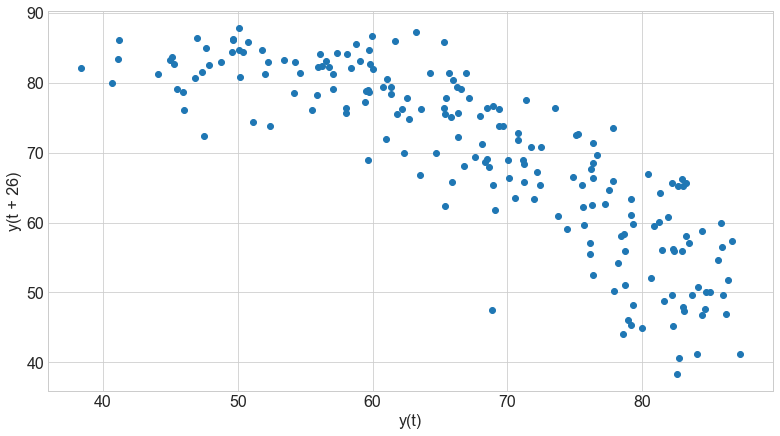

In [32]:
# Simple way to make a lag plot with all the programing

pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

### Autocorrelation Plot

- Calcluates Pearsons R correlation for lag periods

- Curves outside of the dashed line = seasonal patterns

<function matplotlib.pyplot.show(*args, **kw)>

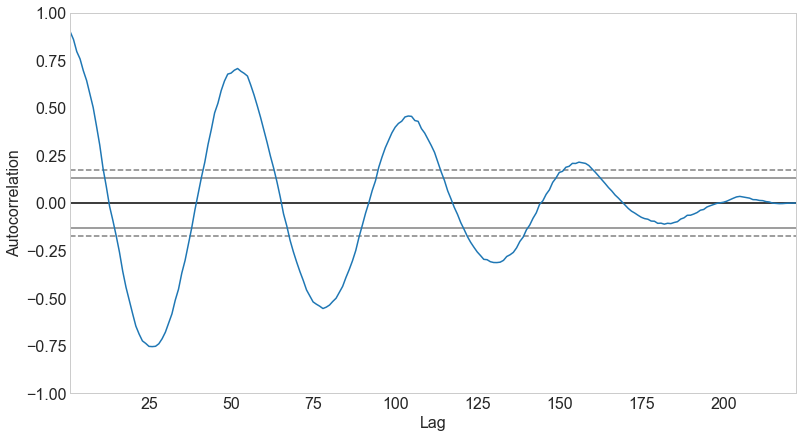

In [44]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())
plt.show

***

***Correlation is greatest at 25 and 50 weeks, decreasing periodically over time.  An autocorrelation plot is a great way to visualize seasonality***

***

### Seasonal Decomposition

- Seasonal + trend + error

- The idea that a time series datat set can be modeled by seasonal patterns, trends, and coefficents of errors

- 

In [34]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
datetime,,,,
2012-10-07,70.595201,NaN,8.545501,NaN
2012-10-14,70.152821,NaN,7.255470,NaN
2012-10-21,71.138375,NaN,2.468309,NaN
2012-10-28,71.230464,NaN,1.820126,NaN
2012-11-04,63.510554,NaN,-0.114287,NaN


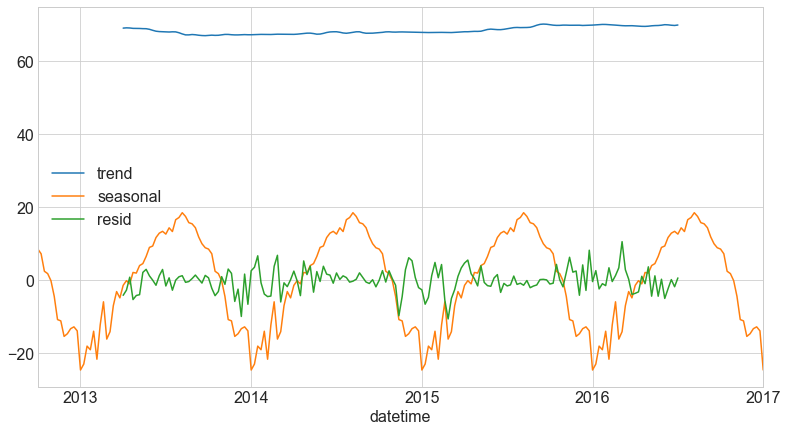

In [35]:
decomposition.iloc[:, 1:].plot()

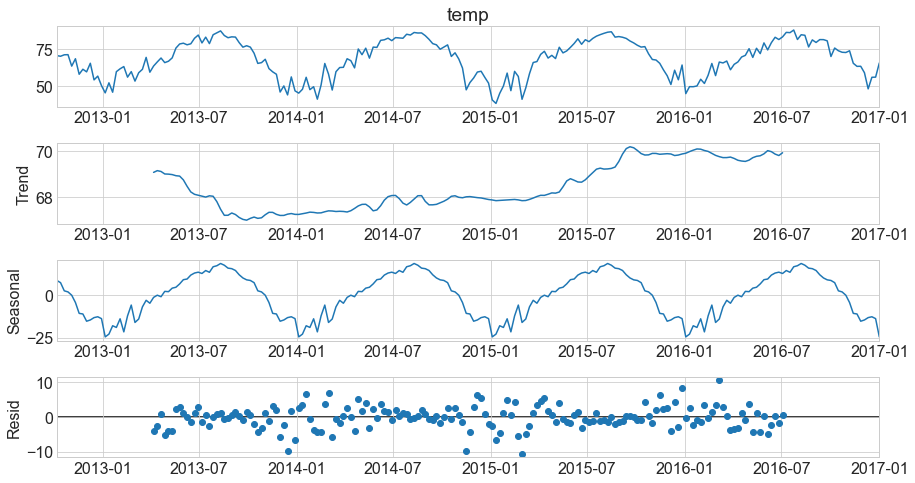

In [36]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Categories over time

In [37]:
train = train.resample('D').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()

,temp
temp_bin,
cold,49.381699
cool,65.200219
warm,75.447977
hot,83.449087


Text(0, 0.5, '% of days in the month')

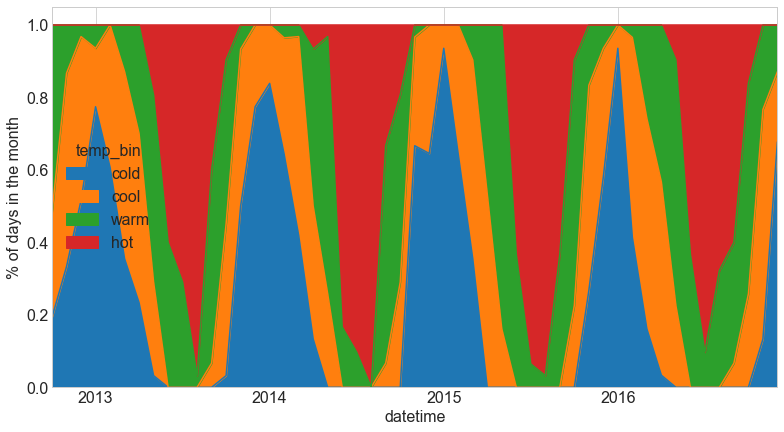

In [38]:
(train.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

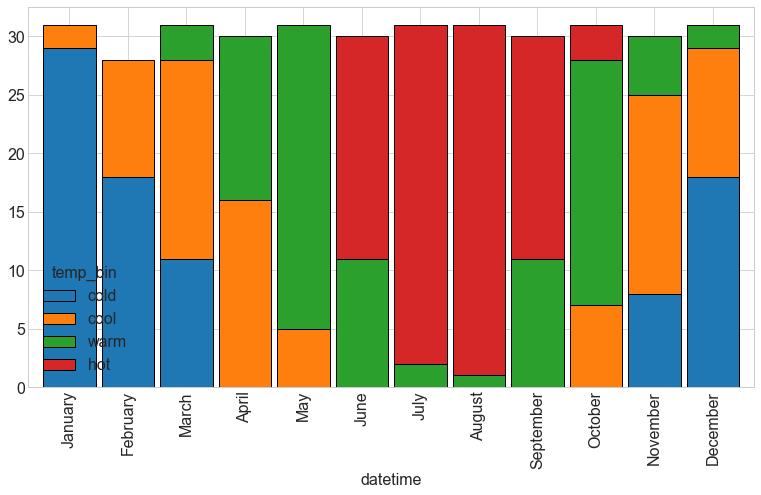

In [39]:
ax = (train['2015']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

## `strftime`

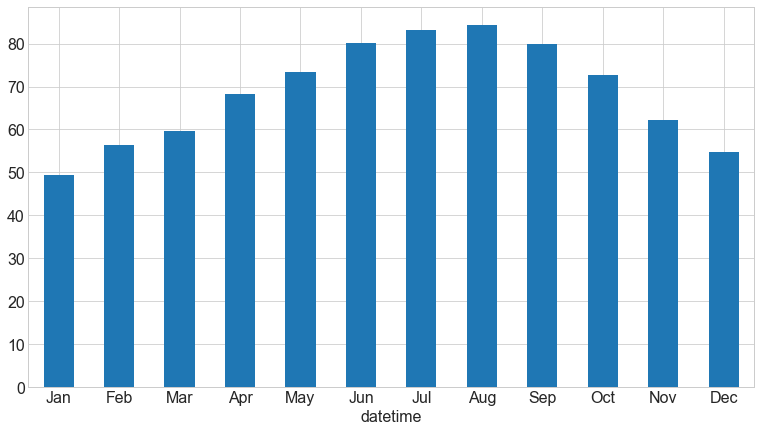

In [40]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

## Matplotlib Dates

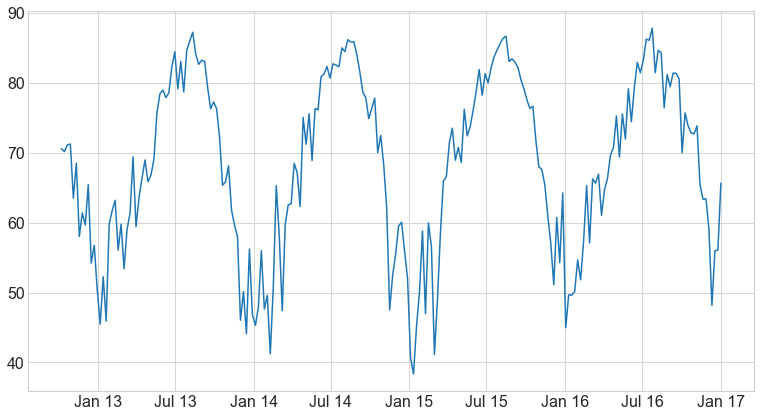

In [41]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))